### Image Segmentation using Thresholding
#### Theory:
Thresholding is a fundamental technique in image segmentation that converts a grayscale image into a binary image. The process involves selecting a threshold value and classifying each pixel as either foreground or background based on its intensity relative to the threshold.
1. **Global Thresholding:**
Global thresholding uses a single threshold value for the entire image. Otsu's method is a popular algorithm for determining this optimal threshold. It maximizes the between-class variance..

2. **Adaptive Thresholding:**
Adaptive thresholding is used when the illumination across the image is non-uniform. Instead of a single global threshold, it computes a threshold for each pixel based on the local neighborhood. 

By understanding and implementing these techniques, we can effectively segment images and extract meaningful information for further analysis.
#### Objectives:
- Understand the concept of image thresholding and its importance in image processing.
- Implement Otsu's global thresholding method manually.
- Implement adaptive mean thresholding manually.
- Visualize and compare the results of different thresholding techniques.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def manual_otsu_threshold(image: np.ndarray):
    hist = np.bincount(image.flatten(), minlength=256)
    total = image.size

    current_max = 0
    threshold = 0
    sum_total = np.dot(np.arange(256), hist)
    sumB = 0
    wB = 0
    wF = 0
    for t in range(256):
        wB += hist[t]
        if wB == 0:
            continue
        wF = total - wB
        if wF == 0:
            break
        sumB += t * hist[t]
        mB = sumB / wB
        mF = (sum_total - sumB) / wF
        var_between = wB * wF * (mB - mF) ** 2
        if var_between > current_max:
            current_max = var_between
            threshold = t

    binary = np.where(image > threshold, 255, 0).astype(np.uint8)
    return binary, threshold

def manual_adaptive_mean_threshold(image: np.ndarray, block_size=11, C=2):
    pad = block_size // 2
    padded_image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    adaptive_thresh = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i : i + block_size, j : j + block_size]
            mean = np.mean(window)
            if image[i, j] > mean - C:
                adaptive_thresh[i, j] = 255
            else:
                adaptive_thresh[i, j] = 0

    return adaptive_thresh

In [3]:
image = cv2.imread("stdimgs/cameraman.tif", cv2.IMREAD_GRAYSCALE)

otsu_thresh, value = manual_otsu_threshold(image)

adaptive_mean = manual_adaptive_mean_threshold(image, block_size=11, C=2)

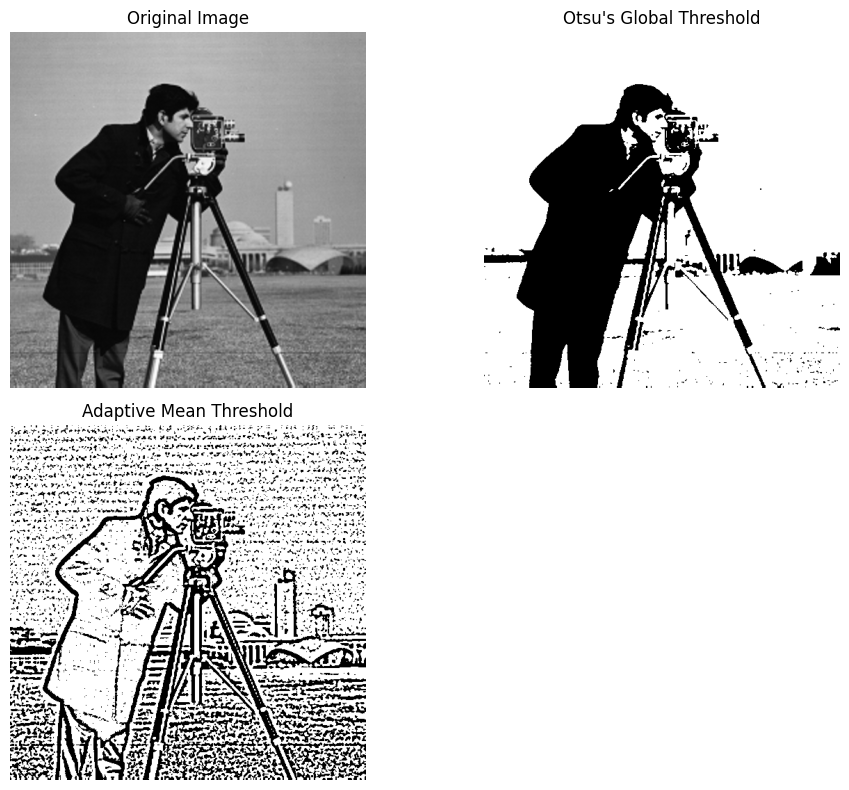

In [4]:

titles = ["Original Image", "Otsu's Global Threshold", "Adaptive Mean Threshold"]
images = [image, otsu_thresh, adaptive_mean]

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()